# Agragacion de datos por categoria

* Crear un DataFrame dummy
* Crear grupos sengun los datos de las filas
    > `doubleGroup = data.groupby(['Col Name1, Col Name2'])`
* Realizar operaciones de agregacion a los datos 'groupby'

        Realizamos 3 operacoines por cada uno de los grupos    
    > `doubleGroup.aggregate([np.sum, np.mean, np.std])` 
    
        Realizamos una operacion propia a cada uno de los grupos
    > `doubleGroup.aggregate([lambda x: np.mean(x) / np.std(x)])`
    
        Crear un grupo con alguna funcion aplicada
    > ```[Python]
    doubleGroup.aggregate(
        {
          'Income' : np.sum,
          'Age' : np.mean,
          'Height' : np.std
       }
    )
      ```

* Aplicar operaciones directamente al grupo
    > ```[Python]
        doubleGroup.describe()
        doubleGroup.mean()
        doubleGroup.sum()
      ```        

In [2]:
import numpy as np
import pandas as pd

In [3]:
gender = ['Male', 'Female']
income = ['Poor', 'Middle Class', 'Rich']

In [4]:
n = 500
genderData = []
incomeData = []

for i in range(0,500):
    # Elegimos aleatoriamente un valor del array 'gender'
    genderData.append(np.random.choice(gender))
    incomeData.append(np.random.choice(income))

In [5]:
# Distribucion uniforme normal: N(m[media], s[desviacion tipica]) 
# z -> (0,1)
# -> m + s * z[distribucion de numeros aleatorios de una normal]

# Altura base de 160 + dispersion de 30 * distribucion uniforme normal de n
height = np.round(160 + 30 * np.random.randn(n),2)
weigth = np.round(65 + 25 * np.random.randn(n),2)
age = list(map(int,30 + 12 * np.random.randn(n)))
income = np.round(18000 + 3500 * np.random.randn(n), 2)

In [6]:
data = pd.DataFrame(
    {
        'Gender' : genderData,
        'Economic Status' : incomeData,
        'Height' : height,
        'Weight' : weigth,
        'Age' : age,
        'Income' : income
    }

)

In [7]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,190.09,76.20,11,22484.56
1,Male,Middle Class,188.53,56.66,24,21114.01
2,Female,Middle Class,212.07,73.77,31,18110.65
3,Female,Middle Class,217.48,20.35,40,15509.73
4,Male,Middle Class,200.46,129.56,6,18509.82


## Agrupacion de Datos

In [9]:
'''La funcion groupby() no divide o separa los datos en diferentes grupos. Lo que hace es
crear un objeto del tipo groupby, que tendra dos atributos, uno sera el nombre y el otro 
sera el grupo. A estos atributos, se puede acceder utilizando la sintaxis tipica de puntos'''

groupedGender = data.groupby('Gender')

In [10]:
groupedGender.groups

{'Female': Int64Index([  2,   3,   5,   6,   8,  16,  17,  18,  19,  29,
             ...
             477, 480, 483, 488, 489, 490, 494, 495, 497, 499],
            dtype='int64', length=214),
 'Male': Int64Index([  0,   1,   4,   7,   9,  10,  11,  12,  13,  14,
             ...
             482, 484, 485, 486, 487, 491, 492, 493, 496, 498],
            dtype='int64', length=286)}

In [12]:
# Recorrera el grupo, que ya esta organizado

for names, groups in groupedGender:
    print(names)
    print(groups)

Female
     Gender Economic Status  Height  Weight  Age    Income
2    Female    Middle Class  212.07   73.77   31  18110.65
3    Female    Middle Class  217.48   20.35   40  15509.73
5    Female            Poor  212.38   51.33   31  17549.66
6    Female            Poor  189.43   89.37   31  12536.99
8    Female    Middle Class  137.53   72.71    0  21468.92
16   Female    Middle Class  158.23   45.62   33  18966.27
17   Female    Middle Class  142.49   49.28   26  16236.02
18   Female            Poor  119.50  108.35   15  15096.50
19   Female            Rich  171.79   85.51   18  13654.95
29   Female            Rich  141.27   61.19   25  20801.70
32   Female            Poor  140.76   90.15   43  20425.56
33   Female            Poor  134.95  123.44   22  17622.59
34   Female    Middle Class  181.75   68.74   24  22014.56
35   Female            Rich  165.35   62.00   35  25458.93
41   Female            Poor  224.39   85.16   35  11833.30
44   Female            Poor  185.90   56.71   10 

In [14]:
# Seleccionar un determinado grupo

groupedGender.get_group('Female')

,Gender,Economic Status,Height,Weight,Age,Income
2,Female,Middle Class,212.07,73.77,31,18110.65
3,Female,Middle Class,217.48,20.35,40,15509.73
5,Female,Poor,212.38,51.33,31,17549.66
6,Female,Poor,189.43,89.37,31,12536.99
8,Female,Middle Class,137.53,72.71,0,21468.92
16,Female,Middle Class,158.23,45.62,33,18966.27
17,Female,Middle Class,142.49,49.28,26,16236.02
18,Female,Poor,119.50,108.35,15,15096.50
19,Female,Rich,171.79,85.51,18,13654.95
29,Female,Rich,141.27,61.19,25,20801.70


In [16]:
# Para cada genero se creara un grupo para cada posible 'Economic Status'
# Por lo tanto, se crearan 6 grupos

doubleGroup = data.groupby(['Gender', 'Economic Status'])

In [19]:
for names, groups in doubleGroup:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status  Height  Weight  Age    Income
2    Female    Middle Class  212.07   73.77   31  18110.65
3    Female    Middle Class  217.48   20.35   40  15509.73
8    Female    Middle Class  137.53   72.71    0  21468.92
16   Female    Middle Class  158.23   45.62   33  18966.27
17   Female    Middle Class  142.49   49.28   26  16236.02
34   Female    Middle Class  181.75   68.74   24  22014.56
45   Female    Middle Class  185.35   23.80   15  18174.54
48   Female    Middle Class  183.54   55.11   18  18923.17
49   Female    Middle Class  167.00   57.88   32  23364.63
63   Female    Middle Class  178.12   69.54   27  17132.04
71   Female    Middle Class  129.53   76.32   28  19343.00
74   Female    Middle Class  179.10   57.14   27  18500.10
77   Female    Middle Class  194.18   39.51   10  19604.92
122  Female    Middle Class  165.50   49.42   20  22094.23
130  Female    Middle Class  158.89   76.98   15  15338.56
134  Female    Middle Class  

## Operaciones sobre datos agrupados

In [21]:
doubleGroup.sum()

Height   Weight   Age      Income
Gender Economic Status                                     
Female Middle Class     11431.69  4726.63  1908  1225965.94
       Poor             11531.65  4788.29  2047  1246440.16
       Rich             12047.11  5129.74  2144  1314871.12
Male   Middle Class     19209.32  7375.29  3487  2154280.02
       Poor             13329.06  5796.62  2576  1565345.17
       Rich             12788.97  5160.70  2450  1412242.59

In [23]:
doubleGroup.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     163.309857  67.523286  27.257143  17513.799143
       Poor             164.737857  68.404143  29.242857  17806.288000
       Rich             162.798784  69.320811  28.972973  17768.528649
Male   Middle Class     158.754711  60.952810  28.818182  17803.967107
       Poor             158.679286  69.007381  30.666667  18635.061548
       Rich             157.888519  63.712346  30.246914  17435.093704

In [25]:
doubleGroup.size()

Gender  Economic Status
Female  Middle Class        70
        Poor                70
        Rich                74
Male    Middle Class       121
        Poor                84
        Rich                81
dtype: int64

In [26]:
doubleGroup.describe()

Age                                                 \
                        count       mean        std  min    25%   50%    75%   
Gender Economic Status                                                         
Female Middle Class      70.0  27.257143  11.708644  0.0  20.00  28.0  33.00   
       Poor              70.0  29.242857  11.540019  4.0  22.00  29.5  37.00   
       Rich              74.0  28.972973  13.869226 -3.0  19.00  29.0  35.75   
Male   Middle Class     121.0  28.818182  12.544587 -6.0  21.00  28.0  38.00   
       Poor              84.0  30.666667  11.148865  8.0  22.75  29.0  37.25   
       Rich              81.0  30.246914  11.379291  2.0  23.00  31.0  37.00   

                             Height               ...        Income            \
                         max  count        mean   ...           75%       max   
Gender Economic Status                            ...                           
Female Middle Class     68.0   70.0  163.309857   ...    19389.9050  23364.63   
       Poor             53.0   70.0  164.737857   ...    20029.4425  28011.08   
       Rich             67.0   74.0  162.798784   ...    19598.6650  25458.93   
Male   Middle Class     66.0  121.0  158.754711   ...    20014.8300  25854.98   
       Poor             62.0   84.0  158.679286   ...    21540.3375  25079.33   
       Rich             67.0   81.0  157.888519   ...    20001.0700  25587.26   

                       Weight                                                \
                        count       mean        std    min      25%     50%   
Gender Economic Status                                                        
Female Middle Class      70.0  67.523286  21.052937  18.80  50.1000  69.140   
       Poor              70.0  68.404143  25.065816  14.86  48.3075  69.225   
       Rich              74.0  69.320811  25.565878  -0.08  54.0800  64.140   
Male   Middle Class     121.0  60.952810  26.214602   1.83  40.6100  61.000   
       Poor              84.0  69.007381  24.691676  16.79  50.8950  66.170   
       Rich              81.0  63.712346  26.994232   0.08  44.7100  63.170   

                                         
                            75%     max  
Gender Economic Status                   
Female Middle Class     82.1600  112.76  
       Poor             85.7750  123.44  
       Rich             92.2175  112.18  
Male   Middle Class     79.0600  131.22  
       Poor             90.2450  122.27  
       Rich             79.3800  141.77  

[6 rows x 32 columns]

In [28]:
groupedIncome = doubleGroup['Income']

In [30]:
groupedIncome.describe()

count          mean          std       min  \
Gender Economic Status                                               
Female Middle Class      70.0  17513.799143  3165.399697  10723.00   
       Poor              70.0  17806.288000  3746.371064  10566.30   
       Rich              74.0  17768.528649  3455.110443   9722.17   
Male   Middle Class     121.0  17803.967107  3209.480508   8144.66   
       Poor              84.0  18635.061548  3898.077433   6162.72   
       Rich              81.0  17435.093704  3338.130264  10060.69   

                               25%        50%         75%       max  
Gender Economic Status                                               
Female Middle Class     15291.9025  17779.460  19389.9050  23364.63  
       Poor             15374.5225  17586.125  20029.4425  28011.08  
       Rich             15324.0200  18024.860  19598.6650  25458.93  
Male   Middle Class     15453.5000  17589.560  20014.8300  25854.98  
       Poor             16413.9250  18929.255  21540.3375  25079.33  
       Rich             15044.7000  17242.330  20001.0700  25587.26

In [31]:
''' Podemos obtener el resultado de una agrupacion y, ademas, procesarla mediante algun tipo de
calculo. Como en el ejemplo, mostramos la suma de todos los ingresos en cada categoria,
mostramos la media de la edad por cada categoria y mostramos la desviacion estandard de cada 
categoria para la altura'''

doubleGroup.aggregate(
    {
        'Income' : np.sum,
        'Age' : np.mean,
        'Height' : np.std
    }
)

Income        Age     Height
Gender Economic Status                                  
Female Middle Class     1225965.94  27.257143  26.327298
       Poor             1246440.16  29.242857  32.618704
       Rich             1314871.12  28.972973  24.224291
Male   Middle Class     2154280.02  28.818182  29.660113
       Poor             1565345.17  30.666667  28.899803
       Rich             1412242.59  30.246914  28.455796

In [34]:
doubleGroup.aggregate(
    {
        'Age' : np.mean,
        'Height' : lambda height:np.mean(height)/np.std(height) #Promedio de las alturas / dev. tipica
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     27.257143  6.247850
       Poor             29.242857  5.086876
       Rich             28.972973  6.766351
Male   Middle Class     28.818182  5.374721
       Poor             30.666667  5.523647
       Rich             30.246914  5.583125

In [57]:
# Aplicar un mismo calculo a todos los grupos

doubleGroup.aggregate([np.sum, np.mean, np.std])

Height                          Weight             \
                             sum        mean        std      sum       mean   
Gender Economic Status                                                        
Female Middle Class     11431.69  163.309857  26.327298  4726.63  67.523286   
       Poor             11531.65  164.737857  32.618704  4788.29  68.404143   
       Rich             12047.11  162.798784  24.224291  5129.74  69.320811   
Male   Middle Class     19209.32  158.754711  29.660113  7375.29  60.952810   
       Poor             13329.06  158.679286  28.899803  5796.62  69.007381   
       Rich             12788.97  157.888519  28.455796  5160.70  63.712346   

                                    Age                            Income  \
                              std   sum       mean        std         sum   
Gender Economic Status                                                      
Female Middle Class     21.052937  1908  27.257143  11.708644  1225965.94   
       Poor             25.065816  2047  29.242857  11.540019  1246440.16   
       Rich             25.565878  2144  28.972973  13.869226  1314871.12   
Male   Middle Class     26.214602  3487  28.818182  12.544587  2154280.02   
       Poor             24.691676  2576  30.666667  11.148865  1565345.17   
       Rich             26.994232  2450  30.246914  11.379291  1412242.59   

                                                   
                                mean          std  
Gender Economic Status                             
Female Middle Class     17513.799143  3165.399697  
       Poor             17806.288000  3746.371064  
       Rich             17768.528649  3455.110443  
Male   Middle Class     17803.967107  3209.480508  
       Poor             18635.061548  3898.077433  
       Rich             17435.093704  3338.130264

In [59]:
# Realizar una operacion matematica 'propi' a todos los elementos

doubleGroup.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     6.247850  3.230467  2.344759  5.572836
       Poor             5.086876  2.748685  2.552335  4.787261
       Rich             6.766351  2.729967  2.103271  5.177784
Male   Middle Class     5.374721  2.334815  2.306812  5.570371
       Poor             5.523647  2.811548  2.767174  4.809290
       Rich             5.583125  2.374926  2.674628  5.255554

## Filtrado de datos

In [64]:
# Se muestran los ELEMENTOS de la agrupacion la suma de la cual supere los 2100
doubleGroup['Age'].filter(lambda x: x.sum() > 2100)

0      11
1      24
4       6
7      26
9      42
10     24
11     25
12     32
13     30
14     28
15     36
19     18
20     36
21     16
22     66
23     26
24     30
25     12
26     35
27     38
28     37
29     25
30     28
31     26
35     35
36     29
37     41
38     36
39     25
40     17
       ..
460    21
461    62
462    28
463    57
464    14
466    38
467    46
468    54
469    21
470    37
471    41
472    39
474    55
478    28
479    29
481    21
482     7
483    67
484    30
485    30
486    13
487    50
489    15
491    37
492    42
493    31
495    19
496    25
498    41
499    43
Name: Age, Length: 360, dtype: int64

## Transformacion de variables

In [67]:
# transform() realiza una operacion a una columna numerica

zscore = lambda x: (x - x.mean())/x.std()

In [69]:
zGroup = doubleGroup.transform(zscore)

In [70]:
import matplotlib.pyplot as plt


(array([  7.,  21.,  55., 123., 120.,  99.,  46.,  19.,   7.,   3.]),
 array([-2.77555422, -2.15002633, -1.52449844, -0.89897054, -0.27344265,
         0.35208524,  0.97761314,  1.60314103,  2.22866892,  2.85419682,
         3.47972471]),
 <a list of 10 Patch objects>)

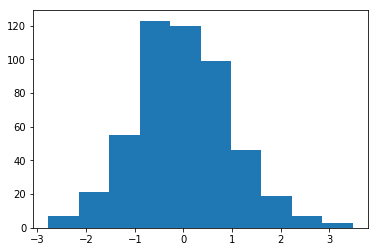

In [74]:
plt.hist(zGroup['Age'])

In [75]:
# En el caso que hubiera valoras vacios se rellenarian con el promedio

fillNaMean = lambda x: x.fillna(x.mean())
doubleGroup.transform(fillNaMean)

,Height,Weight,Age,Income
0,190.09,76.20,11,22484.56
1,188.53,56.66,24,21114.01
2,212.07,73.77,31,18110.65
3,217.48,20.35,40,15509.73
4,200.46,129.56,6,18509.82
5,212.38,51.33,31,17549.66
6,189.43,89.37,31,12536.99
7,127.85,56.70,26,18063.30
8,137.53,72.71,0,21468.92
9,178.04,84.45,42,21069.75


## Operaciones diversas muy utiles

In [77]:
# Podemos obtener la primera/la ultima ocurrencia de cada grupo

doubleGroup.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,190.09,76.20,11,22484.56
2,Female,Middle Class,212.07,73.77,31,18110.65
5,Female,Poor,212.38,51.33,31,17549.66
7,Male,Rich,127.85,56.70,26,18063.30
13,Male,Poor,162.04,46.53,30,23969.20
19,Female,Rich,171.79,85.51,18,13654.95


In [79]:
doubleGroup.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
492,Male,Middle Class,100.01,40.58,42,22592.30
493,Male,Rich,126.31,98.38,31,17348.36
494,Female,Poor,150.47,74.97,25,16473.21
497,Female,Middle Class,157.01,83.93,29,12510.36
498,Male,Poor,162.36,34.08,41,22819.30
499,Female,Rich,162.96,108.09,43,15617.21


In [81]:
# De los 6 grupos, obtenemos el elemento 32

doubleGroup.nth(32)

Age  Height    Income  Weight
Gender Economic Status                               
Female Middle Class      30  174.18  20468.00   70.97
       Poor              30  121.94  16496.75   52.61
       Rich              31  185.86  18813.39   97.00
Male   Middle Class      44  144.60  20157.49   48.64
       Poor              23  185.10  16284.70   94.28
       Rich              32  185.17  13836.76   15.03

In [83]:
# Ordenar la tabla eligiendo la columna. Si hay empate en la edad, se le da prioridad a los ingresos

dataSorted = data.sort_values(['Age', 'Income'])
dataSorted

,Gender,Economic Status,Height,Weight,Age,Income
149,Male,Middle Class,142.77,92.00,-6,18801.50
118,Female,Rich,130.39,103.61,-3,19730.53
55,Female,Rich,176.86,56.36,-2,19635.45
8,Female,Middle Class,137.53,72.71,0,21468.92
65,Female,Rich,135.42,63.84,0,24837.83
97,Male,Rich,161.05,98.08,2,17775.78
364,Male,Rich,117.74,74.21,3,20243.17
359,Male,Middle Class,224.80,119.65,4,16711.52
315,Female,Poor,177.25,40.30,4,19123.51
438,Female,Poor,204.03,47.30,5,18897.74


In [84]:
ageGrouped = dataSorted.groupby('Gender')

In [86]:
ageGrouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
149,Male,Middle Class,142.77,92.00,-6,18801.50
118,Female,Rich,130.39,103.61,-3,19730.53
